<a href="https://colab.research.google.com/github/leaguilar/AIknowthatfeel/blob/master/Workshop1_example_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference


### Simple example: Linear regression

In [0]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [0]:
xd = np.array([0.9, 3.1, 5, 7])
yd = np.array([ 3, 4, 5.3, 6.5 ])

Model

# $ y = f(x) $

# $ y = m \cdot x + b $

In [0]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=10)
    plt.plot(x, m * x + b)
    plt.scatter(xd, yd,color='red', alpha=0.5)
    plt.ylim(-10, 10)
    plt.show()

In [0]:
interactive_plot = interactive(f,m=(-2.0, 2.0), b=(-3, 3, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

# How do we quantify which parameter set is better?

Terms
- Error function
- Loss function
- Cost function
- Objective function

"The function we want to minimize or maximize is called the objective function, or criterion. When we are minimizing it, we may also call it the cost function,loss function, or error function. In this book, we use these terms interchangeably, though some machine learning publications assign special meaningto some of these terms." Goodfellow et al. Deep Learning 2016 (deeplearningbook.org)



Square loss

$L(m,b,y_i)=(f(x_i|m,b)-y_i)^2$

Mean Square Error/Cost

$MSE(m,b) = \frac{1}{N} \sum_{i=1}^N \left (f(x_i|m,b)-y_i \right )^2$

In [0]:
def MSE(mi,bi):
  yp=mi*xd+bi
  ye=(yp-yd)**2
  return ye.mean()
vMSE = np.vectorize(MSE)

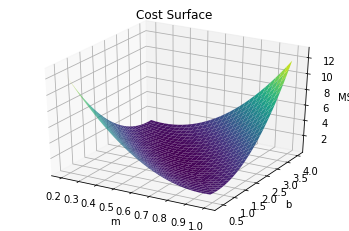

In [0]:
m = np.outer(np.linspace(0.2, 1, 30), np.ones(30))
b = np.outer(np.linspace(0.4, 4, 30), np.ones(30)).T
mse = vMSE(m,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
ax.plot_surface(m, b, mse,cmap='viridis', edgecolor='none')
ax.set_title('Cost Surface')
plt.show()

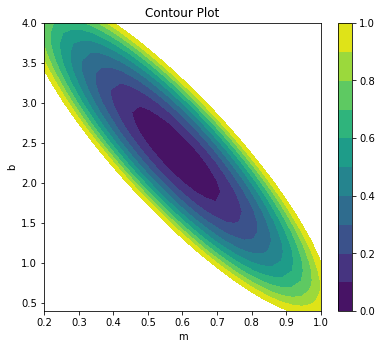

In [0]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]
cp = plt.contourf(m,b, vMSE(m,b),levels)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

Gradient
$\nabla MSE(m,b) = [\frac{\partial MSE(m,b)}{\partial m},\frac{\partial MSE(m,b)}{\partial b}]$



$\frac{\partial MSE(m,b)}{\partial m} = \frac{\partial }{\partial m}(\frac{1}{N} \sum_{i=1}^N \left (f(x_i|m,b)-y_i \right )^2)$

 $= \frac{2}{N} \sum_{i=1}^N (f(x_i|m,b)-y_i) \frac{\partial }{\partial m}\left (f(x_i|m,b)-y_i \right )$

 
 $= \frac{2}{N} \sum_{i=1}^N \left (f(x_i|m,b)-y_i \right ) \cdot x_i$

 $\frac{\partial MSE(m,b)}{\partial b} = \frac{\partial }{\partial b}(\frac{1}{N} \sum_{i=1}^N \left (f(x_i|m,b)-y_i \right )^2)$

 $= \frac{2}{N} \sum_{i=1}^N (f(x_i|m,b)-y_i)\frac{\partial }{\partial b}\left (f(x_i|m,b)-y_i \right )$

 
 $= \frac{2}{N} \sum_{i=1}^N \left (f(x_i|m,b)-y_i \right )$

we will ignore the $\frac{2}{N}$ constant



In [0]:
def gMSE(mi,bi,alpha=0.1):
  yp=mi*xd+bi
  ye=(yp-yd)
  return (ye*xd).sum()*alpha,ye.sum()*alpha 

In [0]:
gMSE(0.5,0.5,1)


(-36.89, -8.8)

In [0]:
MSE(0,6)

3.435

4.88625
0.01128305582762001
0.582762000358653 2.3689519957428895


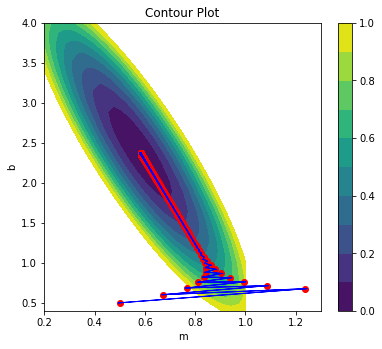

In [0]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]
cp = plt.contourf(m,b, vMSE(m,b),levels)
plt.colorbar(cp)

dm=0
db=0
mi=0.5
bi=0.5
alpha=0.02

print(MSE(mi,bi))
nm=[]
nb=[]
for i in range(1,1000):
  mi=mi-dm
  bi=bi-db
  dm,db=gMSE(mi,bi,alpha)
  plt.arrow(mi-dm,bi-db,dm,db,head_width=0.005,color='blue')
  nm.append(mi)
  nb.append(bi)
print(MSE(mi,bi))
print(mi,bi)
plt.scatter(nm,nb,color='red')
ax.set_title('Contour Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

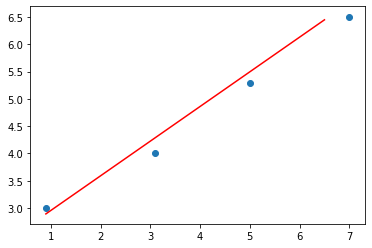

In [0]:
# Inference
Y_pred = mi*xd + bi

plt.scatter(xd, yd)
plt.plot([min(xd), max(yd)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()